In [13]:
import numpy as np
import pandas as pd

# Параметри
p = 8
n = 10
x0 = p
xn = p + 10
h = (xn - x0) / n

# Функція


def f(x):
    return (1 / p) * np.sin(np.log(x + p))


# Табуляція
x_values = np.linspace(x0, xn, n + 1)
y_values = f(x_values)

# Збереження у файл
data = pd.DataFrame({'x': x_values, 'f(x)': y_values})
data.to_csv("nodes.txt", index=False, sep='\t')

# Вивід
print("Табульовані значення:")
print(data)

Табульовані значення:
       x      f(x)
0    8.0  0.045086
1    9.0  0.037939
2   10.0  0.031073
3   11.0  0.024485
4   12.0  0.018168
5   13.0  0.012115
6   14.0  0.006316
7   15.0  0.000762
8   16.0 -0.004557
9   17.0 -0.009651
10  18.0 -0.014530


In [14]:
# Функція для обчислення розділених різниць
def divided_differences(x, y):
    n = len(x)
    coef = np.copy(y)
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1:n - 1]) / (x[j:n] - x[0:n - j])
    return coef
# Функція Ньютона
def newton_polynomial(x_data, coef, x):
    n = len(coef)
    result = coef[0]
    for i in range(1, n):
        term = coef[i]
        for j in range(i):
            term *= (x - x_data[j])
        result += term
    return result

# Зчитування з файлу
nodes = pd.read_csv("nodes.txt", sep='\t')
x_nodes = nodes['x'].values
y_nodes = nodes['f(x)'].values

# Коефіцієнти розділених різниць
coef = divided_differences(x_nodes, y_nodes)

# Перевірка для довільного x
x_test = p + 5
f_exact = f(x_test)
f_interp = newton_polynomial(x_nodes, coef, x_test)
error = f_exact - f_interp

print(f"f({x_test}) = {f_exact}")
print(f"N({x_test}) = {f_interp}")
print(f"Похибка ε({x_test}) = {error}")


f(13) = 0.01211473061680307
N(13) = 0.012114730616803
Похибка ε(13) = 6.938893903907228e-17


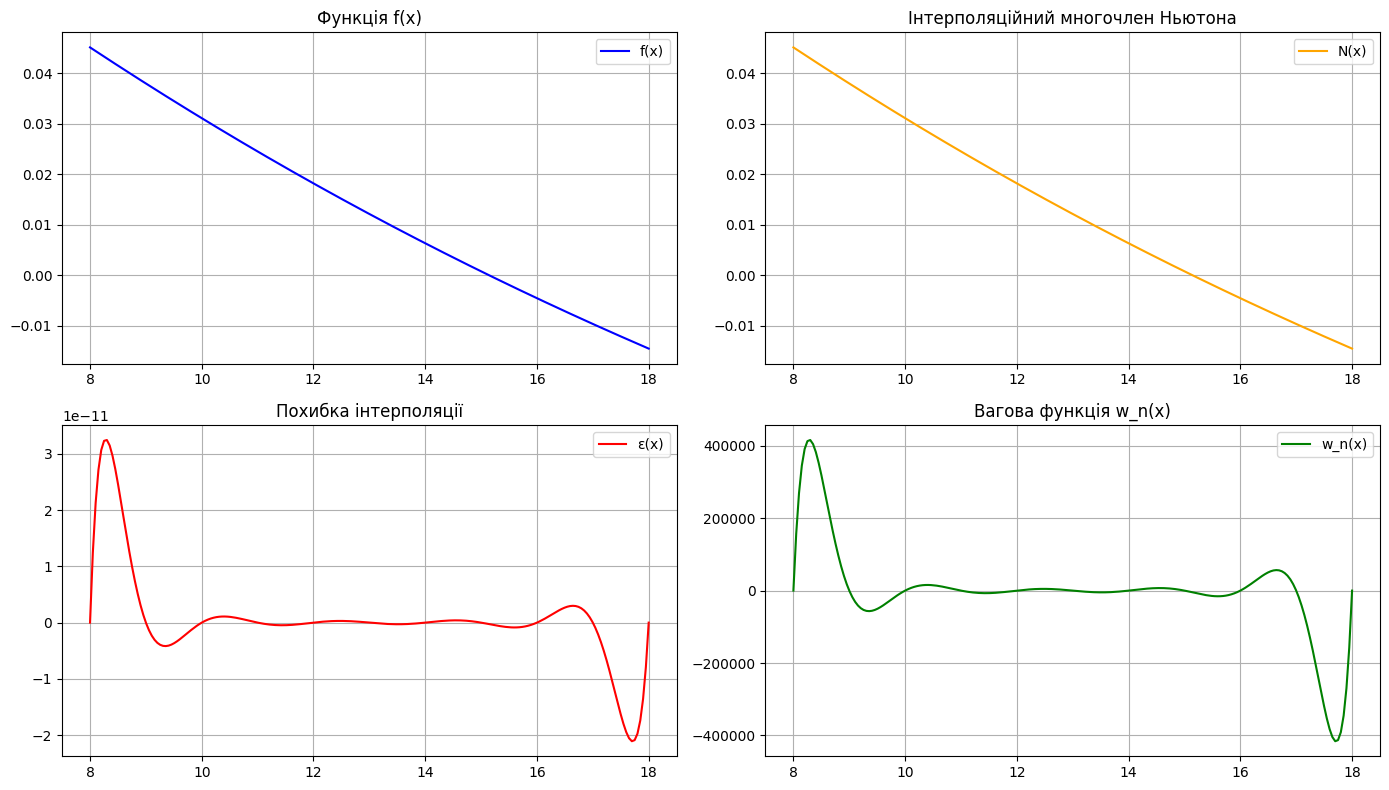

In [15]:
import matplotlib.pyplot as plt

# Вагова функція w_n(x)


def w_n(x, x_nodes):
    w = 1
    for xi in x_nodes:
        w *= (x - xi)
    return w

    
# Сітка
x_plot = np.linspace(x0, xn, 200)
f_plot = f(x_plot)
n_plot = [newton_polynomial(x_nodes, coef, x) for x in x_plot]
eps_plot = f_plot - n_plot
w_plot = [w_n(x, x_nodes) for x in x_plot]

# Побудова графіків
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(x_plot, f_plot, label='f(x)', color='blue')
plt.title("Функція f(x)")
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_plot, n_plot, label='N(x)', color='orange')
plt.title("Інтерполяційний многочлен Ньютона")
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_plot, eps_plot, label='ε(x)', color='red')
plt.title("Похибка інтерполяції")
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_plot, w_plot, label='w_n(x)', color='green')
plt.title("Вагова функція w_n(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
ns = [5, 10, 20]
x_test = np.linspace(p, p + 10, 100)
results = {}

for n in ns:
    x_nodes = np.linspace(p, p + 10, n + 1)
    y_nodes = f(x_nodes)
    coef = divided_differences(x_nodes, y_nodes)
    interpolated = np.array([newton_polynomial(x_nodes, coef, x) for x in x_test])
    exact = f(x_test)
    error = np.abs(exact - interpolated)
    results[n] = error
    print(f"n = {n}, Середня похибка: {np.mean(error):.2e}, Максимальна: {np.max(error):.2e}")


n = 5, Середня похибка: 9.17e-08, Максимальна: 3.31e-07
n = 10, Середня похибка: 3.61e-12, Максимальна: 3.25e-11
n = 20, Середня похибка: 3.32e-15, Максимальна: 7.57e-14
